<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


Working with a dataset relating to posts and comments on the subreddit r/VaccineMyths.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
reddit_df = pd.read_csv('reddit_vm.csv', sep=',')

In [5]:
reddit_df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [6]:
reddit_df.tail()

,title,score,id,url,comms_num,created,body,timestamp
1597,Comment,2,elrv9ua,NaN,0,1.556223e+09,Lol. My comprehension is comprehensive.\nYou a...,2019-04-25 23:11:10
1598,Comment,1,elrud7d,NaN,0,1.556223e+09,"If you have trouble finding it, that's one thi...",2019-04-25 23:02:04
1599,Comment,0,elrtjl5,NaN,0,1.556222e+09,Is there music playing where you are because y...,2019-04-25 22:53:50
1600,Comment,1,elrrt5l,NaN,0,1.556221e+09,How long does it take ethyl mercury to metabol...,2019-04-25 22:35:39
1601,Comment,1,elrqfk3,NaN,0,1.556220e+09,> Why is it sounding like I'm scraping the bot...,2019-04-25 22:21:34


In [7]:
reddit_df.keys()

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp'],
      dtype='object')

In [8]:
reddit_df.dtypes

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object

In [9]:
reddit_df.sort_values('score', ascending=False)

,title,score,id,url,comms_num,created,body,timestamp
512,I would rage if this was handed to me...,1187,21zc6n,http://m.imgur.com/a/bZDWg,595,1.396406e+09,NaN,2014-04-02 05:32:42
510,From /r/Rage,45,221h6d,http://imgur.com/a/sZf8z,13,1.396469e+09,NaN,2014-04-02 23:01:49
212,Vaccines exposed,38,kfctnr,https://i.redd.it/3ebjmlp8uk561.jpg,4,1.608261e+09,NaN,2020-12-18 05:11:12
291,Do not give a platform for anti-vaxxers to pro...,32,apmakx,https://www.reddit.com/r/VaccineMyths/comments...,5,1.549926e+09,I am of the mind to report social media groups...,2019-02-12 01:04:08
465,Meet my friend's anti-vax wife,32,24ay6d,http://imgur.com/hkm8hqC,1,1.398801e+09,NaN,2014-04-29 22:47:41
...,...,...,...,...,...,...,...,...
1589,Comment,-5,em0ilw6,NaN,0,1.556490e+09,The food that would be ingested by the childre...,2019-04-29 01:17:13
1389,Comment,-6,evznk6a,NaN,0,1.564962e+09,Antibodies are too high. This comes from not k...,2019-08-05 02:45:01
56,Comment,-6,ejy5w08,NaN,0,1.554244e+09,Physicians for Informed Consent is a group of ...,2019-04-03 01:22:11
1433,Comment,-10,etc6rgc,NaN,0,1.562677e+09,But that's after already deciding the claim is...,2019-07-09 15:57:21


Cleaning the column 'body' to remove all non-alphabetical characters:

In [10]:
reddit_df['body'] = reddit_df['body'].apply(lambda x: str(x))  # Converting all values to strings
reddit_df['body'] = reddit_df['body'].str.replace('[^a-zA-Z\s]', '') 

/var/folders/mr/dppwnb0n7x5ckk1ggp7xf2f80000gn/T/ipykernel_43968/901834398.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reddit_df['body'] = reddit_df['body'].str.replace('[^a-zA-Z\s]', '')  # Remove non-alphabetical characters


Creating a function to take text input and filter out non-word tokens based on their part-of-speech tags:

In [25]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag

def filter_non_words(text):
   
    tokens = word_tokenize(text)

    tagged_tokens = pos_tag(tokens)

    # Filtering tokens that are identified as nouns, verbs, adjectives, or adverbs
    filtered_tokens = [token for token, tag in tagged_tokens if tag in ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']]

    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

[nltk_data] Downloading package punkt to /Users/sara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
reddit_df['cleaned_body'] = reddit_df['body'].apply(filter_non_words)

Now we're going to perform a sentiment analysis on the newly cleaned 'body' column, rating them either 'positive', 'negative', or 'neutral'.

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sara/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
sid = SentimentIntensityAnalyzer()

In [16]:
reddit_df['sentiment_scores'] = reddit_df['body'].apply(lambda text: sid.polarity_scores(text))

In [17]:
reddit_df['compound_sentiment'] = reddit_df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

reddit_df['sentiment'] = reddit_df['compound_sentiment'].apply(classify_sentiment)

In [18]:
print(reddit_df['sentiment'])

0        neutral
1        neutral
2        neutral
3        neutral
4        neutral
          ...   
1597    positive
1598    positive
1599    positive
1600    negative
1601     neutral
Name: sentiment, Length: 1602, dtype: object


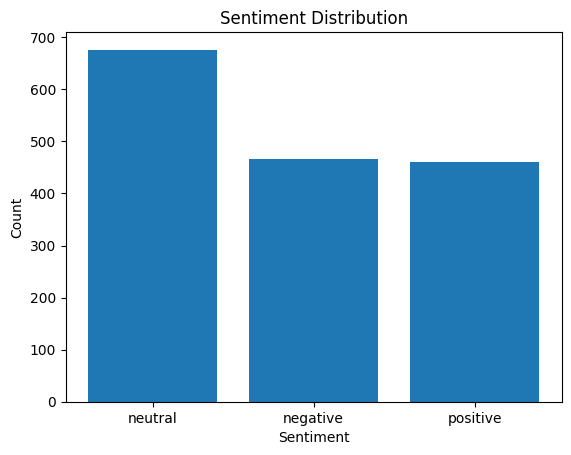

In [19]:
import matplotlib.pyplot as plt

sentiment_counts = reddit_df['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


Finally, turning the data from the 'body' column into a word cloud.

In [20]:
from wordcloud import WordCloud

In [24]:
# Turning the column into a single string
text_data = ''.join(reddit_df['body'])

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

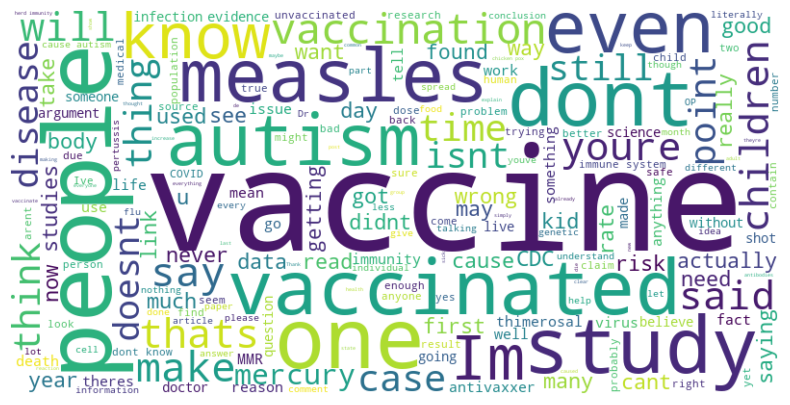

In [23]:
# Creating a visual representation of the word cloud using Matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()